In [1]:
import compute_charge_dist as fz
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

import PeHeat_Functions as peh

%matplotlib inline

microntocm    = 1.0e-4
cmtomicron    = 1.0e4
AAtocm        = 1.0e-8
cmtoAA        = 1.0e8
microntoAA    = 1.0e4
AAtomicron    = 1.0e-4
ergtoeV       = 6.242e11
eVtoerg       = 1.602e-12

hplanck       = 4.135667662e-15 # eV s
clight        = 2.99792458e10   # cm s-1

Loading the library to compute the charge distribution of dust grains.


In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from   matplotlib.colors import LogNorm

from scipy.optimize import curve_fit

import time

%matplotlib inline


grain_type = "silicate"
#grain_type = "carbonaceous"
pcent      = 1

########################################################################################

grain_size = 100

save_dir = "/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju"
filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
#filename = "CompletenessCopy_0005AA_sil_CR.pkl"

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist = pickle.load(pkl_file)
pkl_file.close

IOError: [Errno 2] No such file or directory: '/home/jcibanezm/codes/run/ChargeStatisticsAnalysis/Daikaiju/fz_0100AA_silicate_CR_True_1_pcent.pkl'

In [3]:
########################################################################################

grain_size =100

#save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"
save_dir = "/Users/juan/Dropbox/codes/run/ChargeStatisticsAnalysis/Daikaiju"

#filename = "fz_%.4iAA_%s_CR_True_%i_pcent.pkl"%(grain_size, grain_type, pcent) 
filename = "fz_0%.2iAA_silicate_CR_True_1_pcent.pkl"%(grain_size)

pkl_file    = open("%s/%s"%(save_dir, filename), "rb")
cdist = pickle.load(pkl_file)
pkl_file.close

# Load Qabs.
Qabs = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

## Heating per grain:

$$ \Gamma^{'}_{pe}(a) = \sum_{Z}f_{Z}(Z)\Gamma^{''}_{pe}(a,Z,G)$$

In [4]:
# Need to separate fZ for each grain.

In [5]:
#I could just compute Gamma_pe_a_Z for all possible Z's, and just give it to the function.
# Because if I have to loop over each grain and have to compute Gamma_pe_a_Z every time, it will take longer...

In [7]:
grain_type="silicate"
#Qabs = fz.get_QabsTable(grain_type, grain_size)
Qabs = fz.get_QabsTable(grain_type, grain_size, dirtables="/Users/juan/codes/dustanalysis/Charge/Tables")

Zmin_sil, Zmax_sil = fz.get_Zmin(grain_size, grain_type), fz.get_Zmax(grain_size, grain_type)
Znum_sil = int(Zmax_sil + abs(Zmin_sil) +1)
ZZ_sil = np.linspace(Zmin_sil, Zmax_sil, num=Znum_sil)

Gamma_dotdot_Z_sil = np.zeros_like(ZZ_sil, dtype=np.float)

for i in range(Znum_sil):
    Gamma_dotdot_Z_sil[i] = peh.get_Gamma_pe_dotdot(grain_size, ZZ_sil[i], grain_type, 0.0, Qabs, G0=1.7)

Gamma_a = np.zeros_like(cdist["zmean"], dtype=np.float)
cum = 0

#for index in range(100):
for index in range(len(Gamma_a)):
    
    zmin = cdist["zminmax"][index*2]
    zmax = cdist["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist["G"][index] + cdist["G_CR"][index]
        
    Gamma_dotdot_Z_sil_scaled = Gamma_dotdot_Z_sil*(Gtot/1.7)

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist["fdist"][index]
    cum += znum
    
    Gamma_a[index]= peh.Gamma_per_grain(ZZ_sil, Gamma_dotdot_Z_sil_scaled, ZZfz, ffz, Gtot)
    #print(Gamma_a[index])

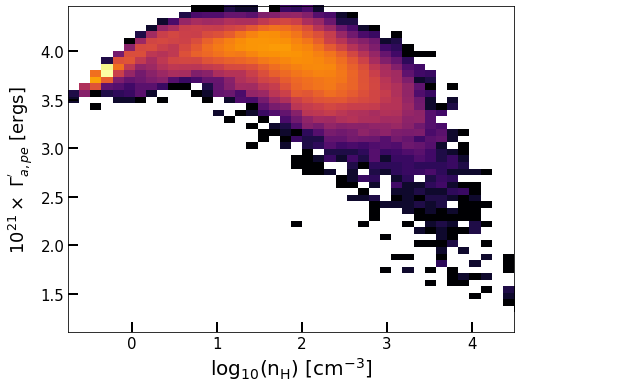

In [15]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist2d(np.log10(cdist["nH"]),np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno")

ax.set_xlabel("log$_{10}$(n$_{\mathrm{H}}$) [cm$^{-3}$]", fontsize=20)
ax.set_ylabel("10$^{21} \\times$ $\Gamma^{'}_{a, pe}$ [ergs]", fontsize=18)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

#ax.set_yscale("log")

ax.set_xlim(np.log10(np.min(cdist["nH"])), 4.5)

fig.show()

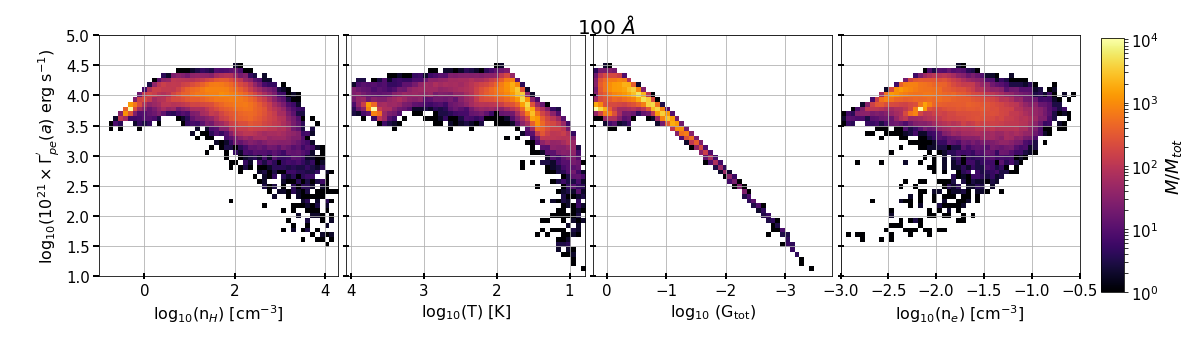

In [36]:
xsize = 16
ysize = 4.3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.14
wpad = 0.06
wwpad = 0.007

xs_panel = 0.83 / nfigs_x 
ys_panel = 0.78 / nfigs_y 

#total_mass = np.sum(cell_mass_int)

############################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(cdist["nH"]), np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-1, 4.3],[1, 5]])
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("log$_{10}(10^{21} \\times \Gamma^{'}_{pe}(a)$ erg s$^{-1})$", fontsize=16)
ax.set_xlabel("log$_{10}$(n$_{H}$) [cm$^{-3}$]", fontsize=16)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


############################################################################################################
############################                T          #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["temp"]), np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[0.5, 4.0],[1, 5]])

#ax.hist2d(np.log10(cdist["temp"][0:len(cell_mass)]), cdist["zstd"][0:len(cell_mass)], bins=50, norm=LogNorm(), cmap="magma", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("log$_{10}$(T) [K]", fontsize=16)

ax.set_xlim([np.max(np.log10(cdist["temp"])),np.min(np.log10(cdist["temp"]))])

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)




############################################################################################################
############################               G            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

# Missing G_CR
ax.hist2d(np.log10(cdist["G"]+cdist["G_CR"]), np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3.8, np.log10(1.7)],[1, 5]])

#cax = ax.hist2d(np.log10(cdist["G"][0:len(cell_mass)]+G_CR[0:len(cell_mass)]), cdist["zstd"][0:len(cell_mass)], bins=50, norm=LogNorm(), cmap="magma", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")


ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("log$_{10}$ (G$_{\\mathrm{tot}}$)", fontsize=16)

#ax.set_xlim([np.log10(1.7),np.min(np.log10(cdist["G"]))])
ax.set_xlim(np.log10(1.7),-3.8)

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


############################################################################################################
############################               ne            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["ne"]), np.log10(Gamma_a*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3, -0.5],[1, 5]])

#Gamma_a*1.0e21, bins=50, norm=LogNorm(), cmap="", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off

ax.set_xlabel("log$_{10}$(n$_{e}$) [cm$^{-3}$]", fontsize=16)


ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)



#################################################################################################
# Add colorbar.
cbar_ax = fig.add_axes([0.93, 0.09, 0.02, 0.82])
cbar    = fig.colorbar(cax[3], cax=cbar_ax, orientation="vertical")

cbar.set_label("$M/M_{tot}$", fontsize=18, labelpad=5)
cbar.ax.tick_params(labelsize=15)

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_Gamma_dot_%iAA.pdf"%grain_size, format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_Gamma_dot_%iAA.pdf"%grain_size, format="pdf")


# Here I should compute the net heating.

$$ \Gamma^{'}_{pe}(a) - \Lambda(a)$$

---

In [48]:
def Cool_Grain(grain_size, grain_type, ZZ, fdist, ntot, xe, temp):
    """
    Compute the cooling per grain.
    """
    import numpy as np
    import math
    import compute_charge_dist as fz

    tau = grain_size * fz.AAtocm * fz.kb * temp / fz.echarge**2
    
    # Loop over species!
    Cool_spec = 0
    for partner in ["electron", "hydrogen", "carbon"]:
    
        Cool_Zall = 0
        # Loop over charge
        for zi in range(len(ZZ)):

            if partner == "electron":
                nu          = -1*ZZ[zi]
                stick_coef  = fz.get_stickCoef(ZZ[zi], grain_size, grain_type)
                charge_frac = xe
                mass        = fz.me
                
            elif partner == "hydrogen":
                nu         = ZZ[zi]
                stick_coef = 1.0
                charge_frac = xe
                mass        = fz.mH
                
            elif partner == "carbon":
                nu         = ZZ[zi]
                stick_coef = 1.0
                # Maximum fraction of ionized Carbon is 1e-4*ntot.
                charge_frac = min(1.0e-4, xe)
                mass        = fz.mC

            Cooltilde = 1.0

            if nu < 0:
                Cooltilde = fz.Jtilde_neg(tau, nu)
            elif nu == 0:
                Cooltilde = fz.Jtilde_0(tau, nu)
            else:
                Cooltilde = fz.Jtilde_pos(tau, nu)

            Cool_Zhere = fdist[zi]*Cooltilde*fz.kb*temp
            Cool_Zall += Cool_Zhere
            
        #print("Collisional Partner = ", partner)
        Cool_spec += ntot*charge_frac*stick_coef*np.sqrt(8.0*fz.kb*temp/(np.pi*mass))*Cool_Zall
        
    Cool_tot = math.pi * (grain_size*AAtocm)**2 * Cool_spec
    
    return Cool_tot

In [51]:
CoolingAA = np.zeros_like(cdist["nH"], dtype=np.float)

cum = 0
for index in range(len(cdist["nH"])):
#for index in range(1):

    zmin = cdist["zminmax"][index*2]
    zmax = cdist["zminmax"][index*2+1]
    znum = int(abs(zmin) + zmax + 1)

    Gtot = cdist["G"][index] + cdist["G_CR"][index]

    ntot = cdist["nH"][index]
    xe   = cdist["new_xe"][index]
    temp = cdist["temp"][index]

    ZZfz = np.arange(zmin, zmax+1, 1)

    ffz = cdist["fdist"][index]
    cum +=znum
    
    #print("Input parameters", grain_type, ZZfz, ffz, ntot, xe, temp)
    CoolingAA[index] = Cool_Grain(100.0, grain_type, ZZfz, ffz, ntot, xe, temp)
    #print(CoolingAA[index])
    

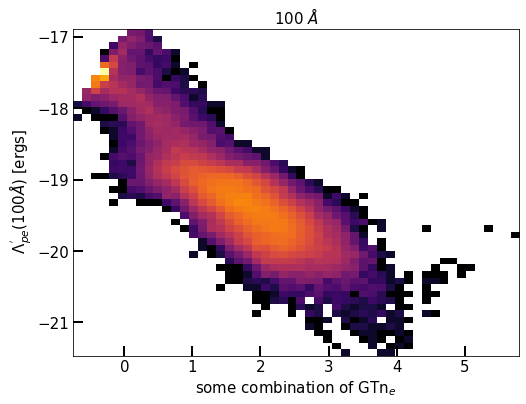

In [52]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist2d(np.log10(cdist["nH"]),np.log10(CoolingAA), bins=50, norm=LogNorm(), cmap="inferno", normed=True)

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(100 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("100 $\AA$", fontsize=15)

fig.show()

In [54]:
netHeat = Gamma_a - CoolingAA

In [57]:
print(np.min(np.abs(netHeat)))
print(np.max(netHeat))

4.43453490324e-21
2.86519530107e-17


In [65]:
neg = np.where(netHeat < 0)

In [70]:
print(len(neg[0]))

61


/Users/juan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


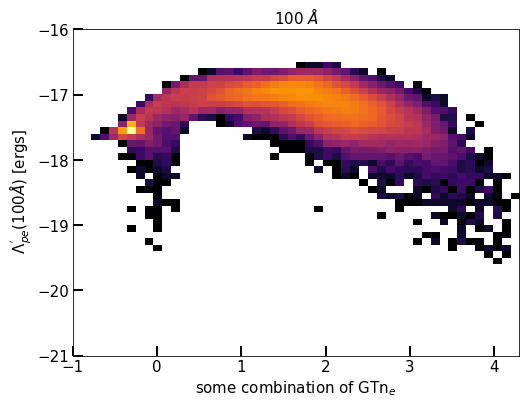

In [59]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist2d(np.log10(cdist["nH"]),np.log10(netHeat), bins=50, norm=LogNorm(), cmap="inferno", normed=True, range=[[-1, 4.3],[-21, -16]])

ax.set_xlabel("some combination of GTn$_{e}$", fontsize=15)
ax.set_ylabel(" $\Lambda^{'}_{pe}(100 \\AA)$ [ergs]", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("100 $\AA$", fontsize=15)

fig.show()

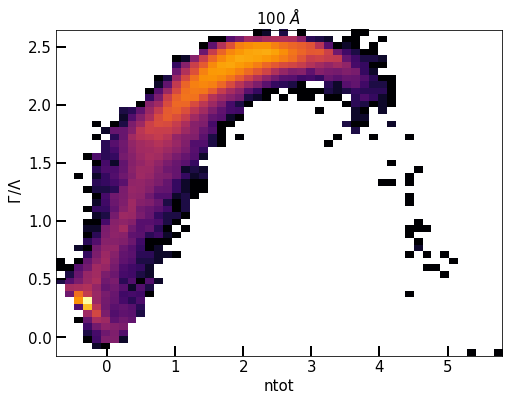

In [64]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.hist2d(np.log10(cdist["nH"]), np.log10(Gamma_a/CoolingAA), bins=50, norm=LogNorm(), cmap="inferno", normed=True)

ax.set_xlabel("ntot", fontsize=15)
ax.set_ylabel(" $\Gamma / \Lambda$ ", fontsize=15)

ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.set_title("100 $\AA$", fontsize=15)

fig.show()

/Users/juan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in log10
/Users/juan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in log10
/Users/juan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in log10
/Users/juan/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:149: RuntimeWarning: invalid value encountered in log10


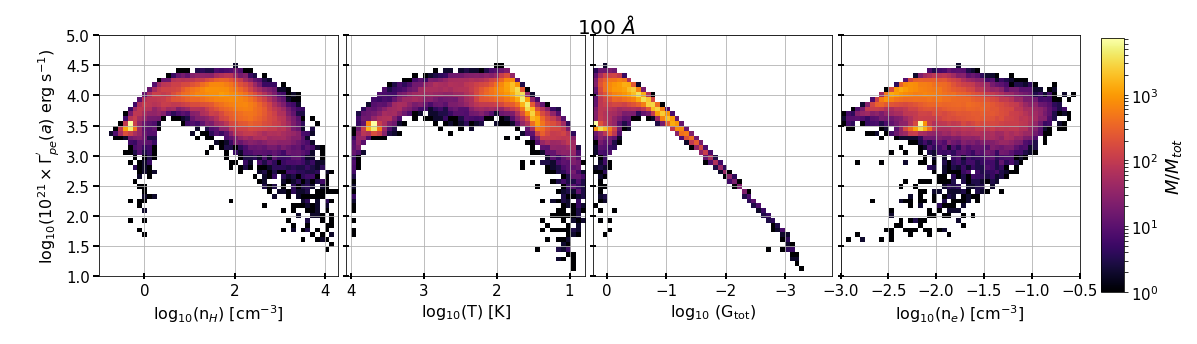

In [71]:
xsize = 16
ysize = 4.3

nfigs_x = 4
nfigs_y = 1

fig = plt.figure(figsize=(xsize, ysize))

hpad = 0.14
wpad = 0.06
wwpad = 0.007

xs_panel = 0.83 / nfigs_x 
ys_panel = 0.78 / nfigs_y 

#total_mass = np.sum(cell_mass_int)

############################################################################################################
############################             n          #######################################
############################################################################################################

ax = fig.add_axes([0, 0, 1, 1])

#ax.plot([0,1], [0,1], visible=False)
ax.set_xlim(0,1)
ax.set_ylim(0,1)

#ax.text(0.18, 0.955, "5 AA", fontsize=20, horizontalalignment='center')

plt.axis('off')

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 0
jj = 0


ax = fig.add_axes([wpad + ii*xs_panel, hpad + jj*ys_panel, xs_panel, ys_panel])

cax = ax.hist2d(np.log10(cdist["nH"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-1, 4.3],[1, 5]])
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on') # labels along the bottom edge are off

ax.set_ylabel("log$_{10}(10^{21} \\times \Gamma^{'}_{pe}(a)$ erg s$^{-1})$", fontsize=16)
ax.set_xlabel("log$_{10}$(n$_{H}$) [cm$^{-3}$]", fontsize=16)

ax.tick_params(axis='x', which='both', bottom='on', labelbottom='on')
ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


############################################################################################################
############################                T          #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 1
jj = 0

ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["temp"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[0.5, 4.0],[1, 5]])

#ax.hist2d(np.log10(cdist["temp"][0:len(cell_mass)]), cdist["zstd"][0:len(cell_mass)], bins=50, norm=LogNorm(), cmap="magma", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("log$_{10}$(T) [K]", fontsize=16)

ax.set_xlim([np.max(np.log10(cdist["temp"])),np.min(np.log10(cdist["temp"]))])

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)




############################################################################################################
############################               G            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 2
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

# Missing G_CR
ax.hist2d(np.log10(cdist["G"]+cdist["G_CR"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3.8, np.log10(1.7)],[1, 5]])

#cax = ax.hist2d(np.log10(cdist["G"][0:len(cell_mass)]+G_CR[0:len(cell_mass)]), cdist["zstd"][0:len(cell_mass)], bins=50, norm=LogNorm(), cmap="magma", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")


ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off


ax.set_xlabel("log$_{10}$ (G$_{\\mathrm{tot}}$)", fontsize=16)

#ax.set_xlim([np.log10(1.7),np.min(np.log10(cdist["G"]))])
ax.set_xlim(np.log10(1.7),-3.8)

ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)


############################################################################################################
############################               ne            #######################################
############################################################################################################

#------------------------------------------------------------------------------------------------
# From bottom left, to upper right.
ii = 3
jj = 0


ax = fig.add_axes([wpad + ii*(xs_panel+wwpad), hpad + jj*ys_panel, xs_panel, ys_panel])

ax.hist2d(np.log10(cdist["ne"]), np.log10(netHeat*1.0e21), bins=50, norm=LogNorm(), cmap="inferno", range=[[-3, -0.5],[1, 5]])

#Gamma_a*1.0e21, bins=50, norm=LogNorm(), cmap="", weights=cell_mass/total_mass, vmin=1.0e-6, vmax=1.0e-1)
#ax.tick_params(axis='both', which='major', length=10, width=2,  labelsize=15, direction="in")
#ax.tick_params(axis='both', which='minor', length=5, width=1.5, labelsize=15, direction="in")

ax.grid("on")

ax.tick_params(
    axis='both',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    direction= 'inout',
    labelbottom='on', labelleft='off') # labels along the bottom edge are off

ax.set_xlabel("log$_{10}$(n$_{e}$) [cm$^{-3}$]", fontsize=16)


ax.tick_params(axis='both', which='major', length=6, width=2, labelsize=15)



#################################################################################################
# Add colorbar.
cbar_ax = fig.add_axes([0.93, 0.09, 0.02, 0.82])
cbar    = fig.colorbar(cax[3], cax=cbar_ax, orientation="vertical")

cbar.set_label("$M/M_{tot}$", fontsize=18, labelpad=5)
cbar.ax.tick_params(labelsize=15)

fig.suptitle("%i $\\AA$"%(cdist["grain_size"]), fontsize=20, y=0.988)

fig.show()

#fig.savefig("/home/jcibanezm/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_Gamma_dot_%iAA.pdf"%grain_size, format="pdf")
fig.savefig("/Users/juan/Dropbox/Projects/Papers/In_Progress/PeHeat_dust/Figures/Figure_3_netHeat_%iAA.pdf"%grain_size, format="pdf")



## Now do this for various grains.